# IBM Capstone Project - Understanding Jakarta Floods Using Data

The purpose of this Capstone project is to understand more of the nature of ever-present problem in the capital of Indonesia, which is flood. 

# Table of Contents
1. [Problems](#problem)
2. [Motivation](#motivation)
3. [About the Data](#data)
4. [Understanding Rainfall Rate and Flood Occurrences](#1)
5. [Predicting Future Floods and their Potential Collateral Damage](#2)
    1. [Rainfall Rate and The Amount of Subdistricts Affected by Floods](#2.1)
    2. [Rainfall Rate and The Amount of People Affected by Floods](#2.2)
6. [Clustering: Finding Out the Districts with High and Low Risks of Floods](#3)
    1. [Feature Extractions for Clustering](#3.1)
    2. [Determining the Number of Cluster](#3.2)
    3. [Clustering](#3.3)
7. [Are the Amount of Parks Helpful to Mitigate the Floods?](#4)
8. [Summary and Conclusion](#summary)

## Problems <a name="problem"></a>

Floods have been by far the most common natural disaster in Jakarta and they occur annually or even monthly, depending how bad the rainfall rate is. In fact, just in January 2020, there were massive floods which by a lot of media regarded as one of the worst flash flooding in Jakarta since 2007, killed 66 people and displaced 60,000 people in the process.

This phenomenon is an ever-present problem for Jakarta. The heavy rainfall and the fact that there are two rivers in-and-around this city makes it really prone to floods. The heavy rainfall are often causing these two rivers to overflow and thus, causing the floods. Based on the data in 2018 only, floods occupied around 40% of natural disasters that occurred in Jakarta throughout the year.

## Motivation <a name="motivation"></a>

Based on the problems described above, it will be interesting to investigate and to understand more the nature of floods in Jakarta. It is interesting to find out by using the data the reason behind its occurrence, when would be the best period of time for the authorities to take precaution or mitigation measures, and which districts should the authorities focus their attention to.

Therefore, there are four different questions regarding floods that will be addressed in this project using the data. These four questions are:
* What is the possible explanatory variable for floods? In this step, the correlation between rainfall rate and the occurrence of floods will be investigated. Also, the suggestion regarding the best time in the year to prepare or to take precautionary measures against floods will be investigated.
* Can we actually predict the amount of subdistricts or people that will be affected by flood just by looking at the rainfall rate? In this step, the correlation between rainfall rate and the subdistricts which are affected by floods will be investigated. Moreover, if possible, we will use this correlation to predict the amount of subdistricts that will be affected by floods in the future.
* If we can predict the amount of subdistricts that will be affected by floods, then which districts that we should focus our attention to when the heavy rainfall pours down the city? In this step, the k-Means clustering will come in handy and will be applied to tackle this problem.
* Are the amount of parks in a given district actually helpful to mitigate the floods? In this step, Foursquare API will be used to retain informations regarding the number of parks in each district and then check whether they have a significant impact to mitigate the floods in Jakarta or not.


## About the Data <a name="data"></a>

To conduct this project,several data sources will be used:
* The flood occurrence data will be fetched from Satu Data Indonesia, which is a website consisting of several open datasets from Indonesian government regarding national issues. However due to data limitations, the flood occurrence that will be investigated is the floods in the span of 2013 until 2017.
* The rainfall rate in the span of 2013 until 2017 will be fetched from BPS, which is a statistic research institute of Indonesia.
* The name of each district in Jakarta will be scraped from Wikipedia page.
* The coordinates of each district will be obtained using geopy library.
* The amount of parks in each district will be obtained using Foursquare API.

So let's jump into question number one.

## Understanding Rainfall Rate and Flood Occurrences <a name="1"></a>

In this step, the correlation between rainfall rate and the flood occurrence is investigated. First, let's start by installing all the necessary libraries.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

First, we need to obtain the data from the sources listed in "About the Data" section above. To obtain the flood occurrence in the span of 2013-2017, we need to gather the data from five different csv files together and store them in a list.

In [2]:
features = ['month','no. of subdistrict affected','no. of People Affected','no. of People Forced to Relocate','Days of Flood Recovery']
year = [2013,2014,2015,2016,2017,2018]
noOfMonth = np.linspace(1,12,num=12)
data =[]

for i in range(len(year)):
    
    df= pd.DataFrame(0,index= np.arange(len(noOfMonth)), columns=features)

    dataFlood = pd.read_csv('Data-Rekap-Banjir-'+str(year[i])+'.csv')

    df = dataFlood[['bulan','kecamatan','jiwa_terdampak','jumlah_jiwa_pengungsi_tertinggi','lama_genangan']].fillna(0)
    df.columns=features
    df['year'] =year[i]
    
    data.append(df)

Then, we put the list into five different data frames. Each data frame consists of flood occurrence in a given year.

In [3]:
dataFlood_2013 = data[0].apply(pd.to_numeric)
dataFlood_2014 = data[1].apply(pd.to_numeric)
dataFlood_2015 = data[2].apply(pd.to_numeric)
dataFlood_2016 = data[3].apply(pd.to_numeric)
dataFlood_2017 = data[4].apply(pd.to_numeric)

Then, we can visualize the flood occurrences in the span of 2013-2017.

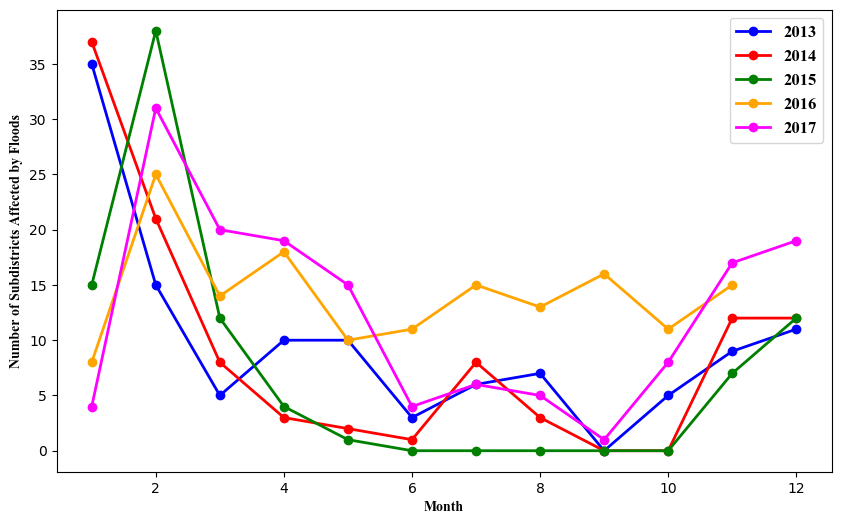

In [7]:
plt.figure(figsize=(10, 6))

plt.rcParams.update(plt.rcParamsDefault)

plt.plot(dataFlood_2013['month'], dataFlood_2013['no. of subdistrict affected'], marker='o', markerfacecolor='blue', markersize=6, color='blue', linewidth=2, label='2013')
plt.plot(dataFlood_2014['month'], dataFlood_2014['no. of subdistrict affected'], marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=2, label='2014')
plt.plot(dataFlood_2015['month'], dataFlood_2015['no. of subdistrict affected'], marker='o', markerfacecolor='green', markersize=6, color='green', linewidth=2, label='2015')
plt.plot(dataFlood_2016['month'], dataFlood_2016['no. of subdistrict affected'], marker='o', markerfacecolor='orange', markersize=6, color='orange', linewidth=2, label='2016')
plt.plot(dataFlood_2017['month'], dataFlood_2017['no. of subdistrict affected'], marker='o', markerfacecolor='magenta', markersize=6, color='magenta', linewidth=2, label= '2017')

plt.legend(loc="upper right",prop={'size': 12,'family':"Times New Roman"})
plt.xlabel('Month',fontname="Times New Roman")
plt.ylabel('Number of Subdistricts Affected by Floods',fontname="Times New Roman")
plt.savefig('flood.png', format='png', dpi=720)
plt.show()

From the graph above, we can see that flood is an ever-present problem in Jakarta. Almost in every month there will be flood affecting some districts of Jakarta. The problem is, it doesn't matter that the year is progressing, but the flood is always there. The flood is not regressed as the year progressed. So, what might be the explanatory variable for flood occurrences in Jakarta? It might be the rainfall rate. So let's find out the answer.

First, we need to extract the data from the BPS regarding the rainfall rate in the span of 2013-2017 and covert it into a data frame.

In [5]:
dataRainfallRate = pd.read_csv('curah-hujan.csv')
dataRainfallRate = dataRainfallRate.iloc[1:13]

d = {'Januari':1, 'Februari':2, 'Maret':3, 'April':4, 'Mei':5, 'Juni':6,\
      'Juli':7,'Agustus':8,'September':9,'Oktober':10, 'November':11, 'Desember':12}

dataRainfallRate = dataRainfallRate[['Bulan','2013','2014','2015','2016','2017']]
dataRainfallRate.Bulan = dataRainfallRate.Bulan.map(d)

dataRainfallRate = dataRainfallRate.apply(pd.to_numeric)

Then, we can visualize the plot similar to before.

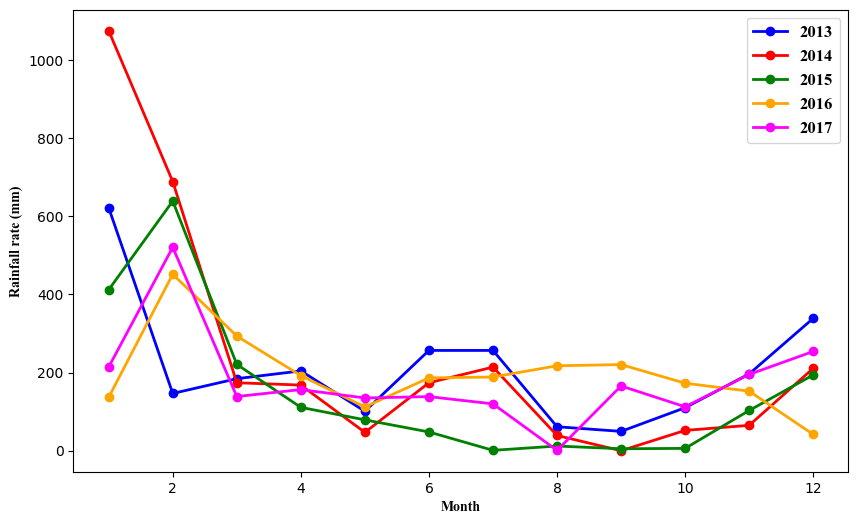

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(dataRainfallRate['Bulan'], dataRainfallRate['2013'], marker='o', markerfacecolor='blue', markersize=6, color='blue', linewidth=2, label='2013')
plt.plot(dataRainfallRate['Bulan'], dataRainfallRate['2014'], marker='o', markerfacecolor='red', markersize=6, color='red', linewidth=2, label='2014')
plt.plot(dataRainfallRate['Bulan'], dataRainfallRate['2015'], marker='o', markerfacecolor='green', markersize=6, color='green', linewidth=2, label='2015')
plt.plot(dataRainfallRate['Bulan'], dataRainfallRate['2016'], marker='o', markerfacecolor='orange', markersize=6, color='orange', linewidth=2, label='2016')
plt.plot(dataRainfallRate['Bulan'], dataRainfallRate['2017'], marker='o', markerfacecolor='magenta', markersize=6, color='magenta', linewidth=2, label='2017')

plt.legend(loc="upper right",prop={'size': 12,'family':"Times New Roman"})
plt.xlabel('Month',fontname="Times New Roman")
plt.ylabel('Rainfall rate (mm)',fontname="Times New Roman")
plt.savefig('rainfall.png', format='png', dpi=720)
plt.show()

From the graph above, we can clearly see that there are similar patterns between the flood occurrences in a given year with the rainfall rate in a given year. Thus, we can say that these two variables are correlated in one another.

We can also see the pattern within the two graphs. The highest rainfall rate will normally occur in January and February. From March and so on the rate will be gradually dipped into its lowest in between August until October before it starts to rise again from November and keeps gradually increasing until January the following year. We can observe the same pattern in the graph with the amount of subdistricts affected by floods.

**Conclusion**: based on the graph, we can conclude that it would be the best if the effort to mitigate the floods is conducted between the month of May until October, where the rainfall rate is in its lowest dip and not a lot of subdistricts are suffering from floods. In this period, the authorities can start to do mitigation measurements so that whenever the rainfall rate increases again in November, the districts and the civilians are prepared already. 

## Predicting Future Floods and their Potential Collateral Damage <a name="2"></a>

### Rainfall Rate and The Amount of Subdistricts Affected by Floods <a name="2.1"></a>

Now that we know that there is a correlation between rainfall rate and the flood occurrences in any given year, then it will be interesting to see their correlation in a visualization. In order to do that, let's build a scatter plot based on the data frame that we have built before.

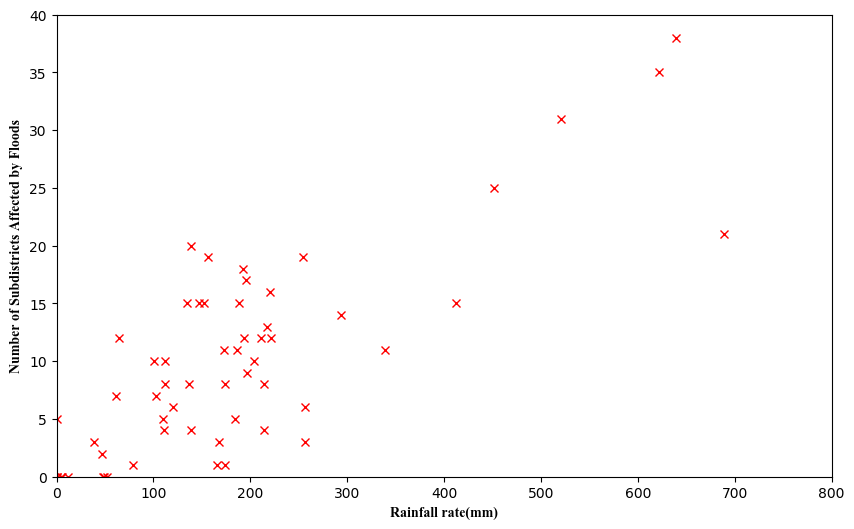

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(dataRainfallRate['2013'], dataFlood_2013['no. of subdistrict affected'],'rx')
plt.plot(dataRainfallRate['2014'], dataFlood_2014['no. of subdistrict affected'],'rx')
plt.plot(dataRainfallRate['2015'], dataFlood_2015['no. of subdistrict affected'],'rx')
plt.plot(dataRainfallRate['2016'][0:-1], dataFlood_2016['no. of subdistrict affected'],'rx')
plt.plot(dataRainfallRate['2017'], dataFlood_2017['no. of subdistrict affected'],'rx')

plt.xlabel('Rainfall rate(mm)',fontname="Times New Roman")
plt.ylabel('Number of Subdistricts Affected by Floods',fontname="Times New Roman")

plt.xlim(0,800)
plt.ylim(0,40)

plt.savefig('corrrainsub.png', format='png', dpi=720)
plt.show()


From the plot itself, we could see that the two variables are positively correlated. Moreover, by seeing the plot, we can conclude that a predictive modelling can be built and by looking at the spreading of the data points, it can be guessed that a linear regression model will be the most appropriate predictive modelling method for this problem.

But before we proceed to build a linear regression model, we need to make some adjustments regarding the data. We need to merge together the data from different years into a list and convert them into array.

In [9]:
pdListX = [dataRainfallRate['2013'], dataRainfallRate['2014'], dataRainfallRate['2015'], \
          dataRainfallRate['2016'][0:-1], dataRainfallRate['2017']]

pdListY_district =[dataFlood_2013['no. of subdistrict affected'],dataFlood_2014['no. of subdistrict affected'],\
                   dataFlood_2015['no. of subdistrict affected'], dataFlood_2016['no. of subdistrict affected'],\
                   dataFlood_2017['no. of subdistrict affected']]

X = pd.concat(pdListX,ignore_index=True).values
Y_district = pd.concat(pdListY_district,ignore_index=True).values

Y_district_array=Y_district.reshape(len(Y_district),1)
X_array = X.reshape(len(X),1)

Then we can start to build a linear regression model using scikit-learn library.

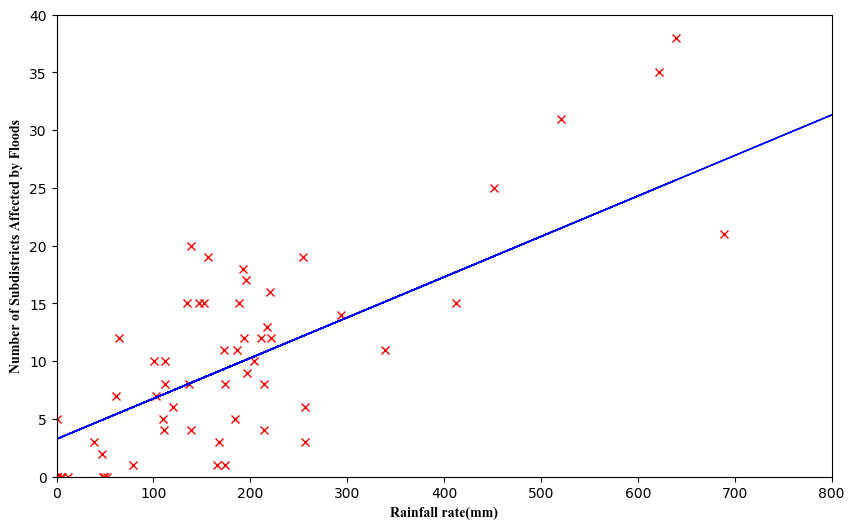

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
xTrain, xTest, yTrain, yTest = train_test_split(X_array,Y_district_array, test_size = 0.3, random_state=40)

lm.fit(xTrain,yTrain)
lmArray = np.asanyarray([lm.intercept_,lm.coef_])

flip = np.flip(lmArray.transpose()).reshape((2,))
normEqPolyFit = np.poly1d(flip)
plt.figure(figsize=(10, 6))
plt.plot(X,Y_district,'rx',X,normEqPolyFit(X),'-b',linewidth=1)
plt.xlabel('Rainfall rate(mm)',fontname="Times New Roman")
plt.ylabel('Number of Subdistricts Affected by Floods',fontname="Times New Roman")

plt.xlim(0,800)
plt.ylim(0,40)

plt.savefig('corrrainsubreg.png', format='png', dpi=720)
plt.show()

And there we have a predictive modeling to estimate the collateral damage caused by floods in the future. From the linear regression model above, now we can estimate the amount of subdistricts that will be affected by floods in any given rainfall rate. Such estimation will be beneficial for the authorities in order to prepare some mitigation measurements plan.

### Rainfall Rate and The Amount of People Affected by Floods <a name="2.2"></a>

Now we know how the rainfall rate and the amount of subdistricts affected by floods correlate with each other and we also know how to predict the amount of subdistricts that will be affected by floods in any given rainfall rate. Next, the correlation between rainfall rate and the amount of people affected by floods will be investigated. Let's first visualize the correlation between these two variables.

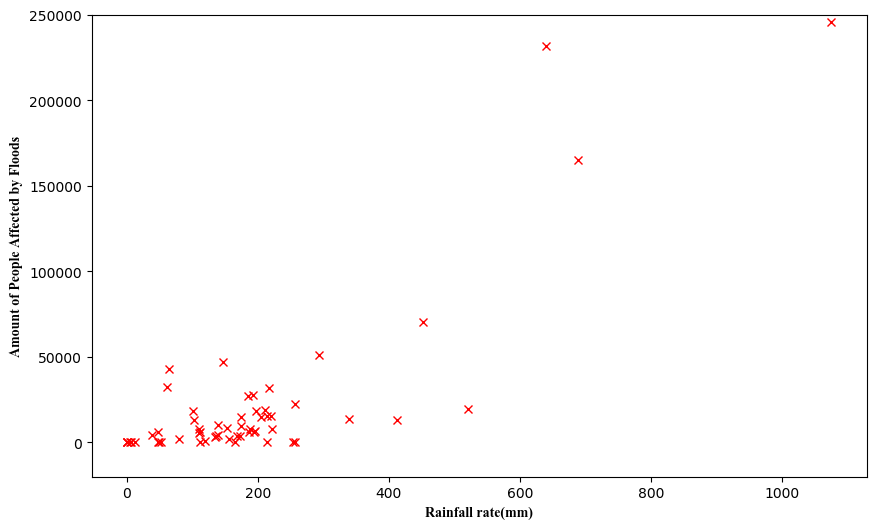

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(dataRainfallRate['2013'], dataFlood_2013['no. of People Affected'],'rx')
plt.plot(dataRainfallRate['2014'], dataFlood_2014['no. of People Affected'],'rx')
plt.plot(dataRainfallRate['2015'], dataFlood_2015['no. of People Affected'],'rx')
plt.plot(dataRainfallRate['2016'][0:-1], dataFlood_2016['no. of People Affected'],'rx')
plt.plot(dataRainfallRate['2017'], dataFlood_2017['no. of People Affected'],'rx')

plt.xlabel('Rainfall rate(mm)',fontname="Times New Roman")
plt.ylabel('Amount of People Affected by Floods',fontname="Times New Roman")
#plt.xlim(0,700)
plt.ylim(-20000,250000)

plt.savefig('corrrainpeop.png', format='png', dpi=720)

plt.show()

By looking at the graph above, we can conclude that the two variables are also positively correlated. However, the spread of datapoints is not similar with the one we have seen before with number of subdistricts affected by flood. Although we can build a regression model to estimate the amount of people affected by flood with a given rainfall rate, but linear model is not going to cut it. It wouldn't be able to catch the trend in datapoints and the cost function will be high.

Therefore, let's try to build polynomial regression model. Before we do so, let's do some data manipulations just like before.

In [12]:
pdListY_population = [dataFlood_2013['no. of People Affected'],dataFlood_2014['no. of People Affected'],\
                      dataFlood_2015['no. of People Affected'],dataFlood_2016['no. of People Affected'],\
                      dataFlood_2017['no. of People Affected']]

Y_population = pd.concat(pdListY_population,ignore_index=True).values
Y_population_array=Y_population.reshape(len(Y_population),1)

X_population = np.delete(X_array, np.argmax(Y_population_array))
X_population = X_population.reshape(len(X_population),1)
Y_population_array = np.delete(Y_population_array, np.argmax(Y_population_array))
Y_population_array = Y_population_array.reshape(len(Y_population_array),1)

Before we build a polynomial regression model, first we need to find what is the proper degree of the polynomial model. In order to do that, we need to fit the polynomial model with a given degree to our datapoints and then check for the $R^2$ value for each degree. In this investigation, the degree of polynomial that will be studied is in between 1 until 10.

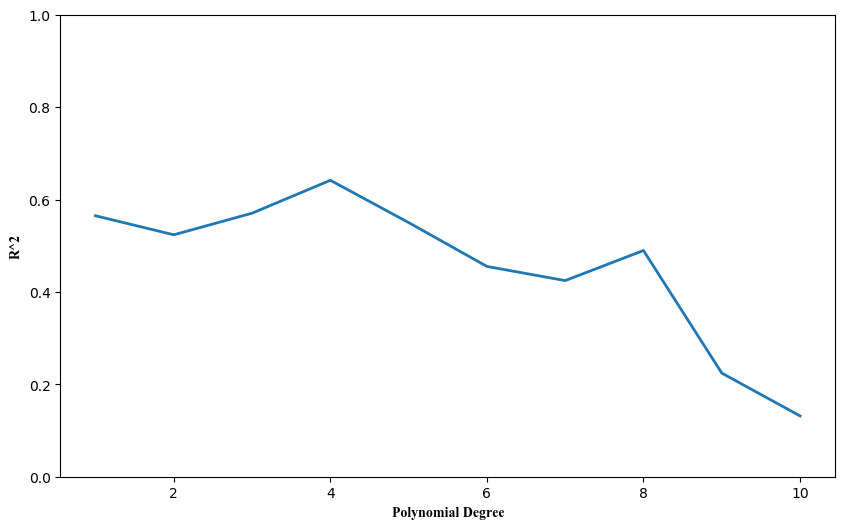

In [13]:
from sklearn.preprocessing import PolynomialFeatures

Rsqu_test = []
xTrain, xTest, yTrain_pop, yTest_pop = train_test_split(X_population,Y_population_array, test_size = 0.3, random_state=40)

order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    xTrain_pr = pr.fit_transform(xTrain)
    xTest_pr = pr.fit_transform(xTest)      
    lm.fit(xTrain_pr, yTrain_pop)
    
    Rsqu_test.append(lm.score(xTest_pr, yTest_pop))

plt.figure(figsize=(10, 6))
plt.plot(order, Rsqu_test, linewidth=2)
plt.xlabel('Polynomial Degree',fontname="Times New Roman")
plt.ylabel('R^2',fontname="Times New Roman")
plt.ylim(0,1)
plt.savefig('rsquare.png', format='png', dpi=720)
plt.show()

From the $R^2$ graph, we can conclude that the polynomial degree between 2 until 4 would be good candidates. The polynomial models with order above 4 showed some obvious sign of overfitting and we don't want a polynomial model that don't generalize well with the datapoints.

Next step, let's check the graph within the polynomial order 2 until 4 and see which polynomial order fits and generalize the datapoints better.

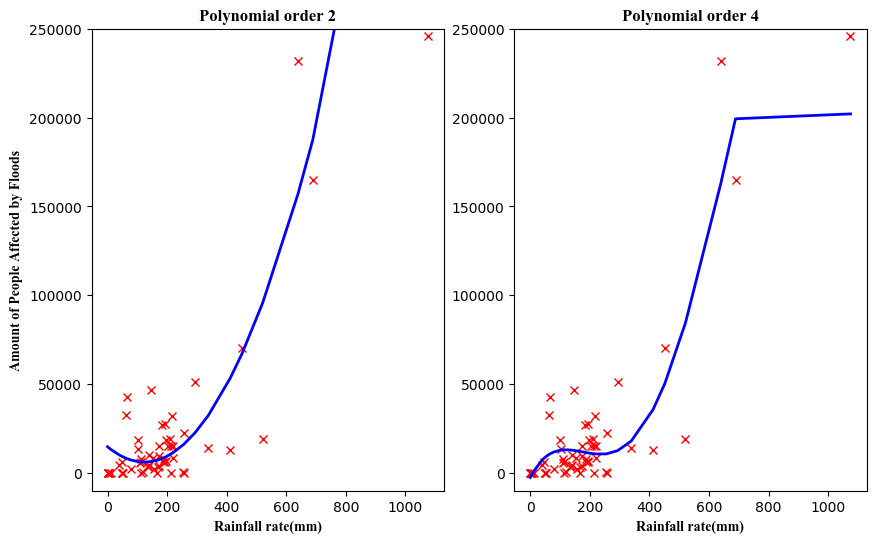

In [14]:
inds = X_population.ravel().argsort()   
X_p = X_population.ravel()[inds].reshape(-1,1)
Y_p = Y_population_array[inds]

xTrain, xTest, yTrain_pop, yTest_pop = train_test_split(X_p,Y_p, test_size = 0.3, random_state=40)
#---------------------------------------------------------------------------------------------------------------
pr_2 = PolynomialFeatures(degree=2)

xFit_Model = pr_2.fit_transform(xTrain) 

lm.fit(xFit_Model, yTrain_pop)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

plt.plot(X_p,Y_p,'rx')
plt.plot(X_p, lm.predict(pr_2.fit_transform(X_p)),'-b',linewidth=2)

plt.title('Polynomial order 2',fontname="Times New Roman")
plt.xlabel('Rainfall rate(mm)',fontname="Times New Roman")

plt.ylabel('Amount of People Affected by Floods',fontname="Times New Roman")
plt.ylim(-10000,250000)
#--------------------------------------------------------------------------------------------------------------
pr_4 = PolynomialFeatures(degree=4)

xFit_Model = pr_4.fit_transform(xTrain)
   
lm.fit(xFit_Model, yTrain_pop)
plt.subplot(1, 2, 2)

plt.plot(X_p,Y_p,'rx')
plt.plot(X_p, lm.predict(pr_4.fit_transform(X_p)),'-b',linewidth=2)

plt.title('Polynomial order 4',fontname="Times New Roman")
plt.xlabel('Rainfall rate(mm)',fontname="Times New Roman")
plt.ylim(-10000,250000)
plt.savefig('pol24.png', format='png', dpi=720)
plt.show()

From the graphs above, we have seen that with polynomial degree = 2, the polynomial model showed a little sign of underfitting the datapoints, especially in the lower region of the graph, which resulting in the low score in $R^2$ metrics. Meanwhile, with polynomial degree = 4, we can clearly see that there are some signs of overfitting the datapoints. Although this overfitting behavior would yield to a high score of $R^2$ metrics, but the model won't generalize well with the datapoints. 

Since the polynomial degree = 2 showed a slight sign of underfitting and polynomial degree = 4 showed a sign of overfitting, let's take a look what it is look like when the polynomial degree = 3.

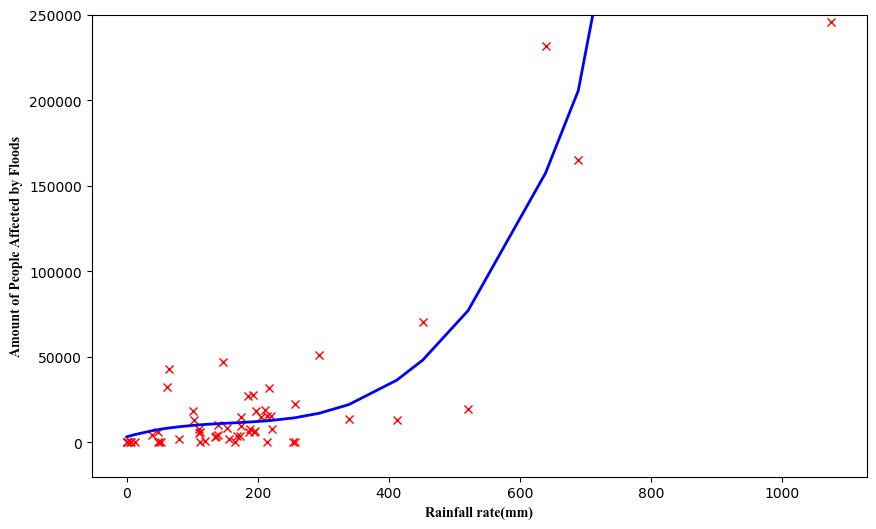

In [15]:
pr_3 = PolynomialFeatures(degree=3)

xFit_Model = pr_3.fit_transform(xTrain)
   
lm.fit(xFit_Model, yTrain_pop)

plt.figure(figsize=(10, 6))
plt.plot(X_p,Y_p,'rx')
plt.plot(X_p, lm.predict(pr_3.fit_transform(X_p)),'-b',linewidth=2)

plt.xlabel('Rainfall rate(mm)',fontname="Times New Roman")
plt.ylabel('Amount of People Affected by Floods',fontname="Times New Roman")
#plt.xlim(0,700)
plt.ylim(-20000,250000)

plt.savefig('corrrainpeopreg.png', format='png', dpi=720)

The graph looks pretty good and just about right, no underfitting and no sign of overfitting. Thus, it can be concluded that the polynomial degree = 3 would yield to the best estimation for this particular problem. With this graph, we now could estimate the number of people that will be affected by floods in any given rainfall rate. This prediction model will be beneficial for the authorities, the rescue teams, or medical teams to be prepared and to estimate the number of people that they need to take care of should heavy rainfall pours down the city.

**Conclusion**: we can predict the estimation of subdistricts and the amount of people that will be affected by floods in any given rainfall rate. We can estimate the number of subdistricts that will be affected by floods with linear regression model since they have more or less linear correlation. Meanwhile, to estimate the amount of people who will be affected by floods, a polynomial regression model with the order of 3 would do the job since they have a nonlinear correlation.

## Clustering: Finding Out the Districts with High and Low Risks of Floods <a name="3"></a>

By now, we already know how the rainfall rate correlates with the amount of subdistricts and people that will be affected by floods. Then, we also already know how to estimate or predict the amounf of subdistricts and people that will be affected by floods in any given rainfall rate. Now the question is, should a heavy rainfall occurs, where should we or the authorities focus their attention to? Is there any district in particular that we should take our attention to?

This chapter will try to answer this question. However, instead of subdistrict, the attention will be focused in the district level so that the visualization wouldn't be too dense. Afterall, each district is a representation of several subdistricts. In order to do this, each of the subdistrict will be assigned to the corresponding district and each of the flood case in the subdistricts will be recorded in the district in which they are located.

To obtain a complete list of the districts in Jakarta, the data from Wikipedia page will be fetched. In order to do so, let's first define a function to parse the HTML.

In [16]:
def parseHTML(website, content, myList):
    
    for i in range (len(website)):
        
        wikiPage = website[i]
        request = requests.get(wikiPage)
        soup = BeautifulSoup(request.content,'lxml')

        table = soup.find_all('table')[content]
        df = pd.read_html(str(table))

        dataFrame = df[0]
        
        myList.append(dataFrame['Kecamatan'].iloc[:-1].values.tolist())
    
    return myList

Then define the website which the information will be fetched. Then, pass this website address to the function defined above and get the list of all of the districts in Jakarta

In [17]:
website1 = ['https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Barat',
           'https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Utara',
           'https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Timur',
           'https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Selatan']

website2 = ['https://id.wikipedia.org/wiki/Daftar_kecamatan_dan_kelurahan_di_Kota_Administrasi_Jakarta_Pusat']

jaka_District = []


jaka_District = parseHTML(website1,0,jaka_District)
jaka_District = parseHTML(website2,0,jaka_District)

Then, let's flatten the list so that in the end we have a list containing the name of all the districts.

In [18]:
def flattenTheList(myList):
    
    flatList = []
    for sublist in myList:
        for item in sublist:
            flatList.append(item)
            
    return list(set(flatList))

listDistrict = flattenTheList(jaka_District)

In [19]:
listDistrict[0:5]

['Ciracas', 'Pulo Gadung', 'Tambora', 'Cengkareng', 'Gambir']

And there we have it. The name of all of the disctricts in Jakarta. Next, we will need the latitude and longitude coordinates of each district so that later we can visualize each district in a map. Thus, let's use the geopy library to do this task.

In [20]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


def do_geocode(address, attempt=1, max_attempts=5):
    try:
        location = geolocator.geocode(address) 
        return location
    
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return do_geocode(address, attempt=attempt+1)
        raise

latitude = []
longitude = []

for i in range (len(listDistrict)):
    
    geolocator = Nominatim(user_agent="Jakarta District")
    location = do_geocode(listDistrict[i])
    latitude.append(location.latitude)
    longitude.append(location.longitude)
    

In [21]:
latitude[0:5]

[-6.3296346, -6.1911085, -6.1466142, -6.1528985, -23.346037000000003]

From the latitude and longitude outputs, we can see that geopy library is able to retain the right coordinate locations of all of the districts, except two, which are Gambir and Tanah Abang. Therefore, in order to correct this, the particular latitude and longitude coordinates for Gambir and Tanah Abang will be scraped from Google. Then, the coordinates in the lists for Gambir and Tanah Abang will be replaced.

In [22]:
def CoordCorrector(listDistrict, latitude, longitude, newLat, newLon, name):
    for i in range (len(latitude)):
        if listDistrict[i] == name:
            latitude[i] = newLat
            longitude[i] = newLon
    return latitude, longitude

latitude,longitude = CoordCorrector(listDistrict, latitude, longitude, -6.1703, 106.8148, 'Gambir')
latitude,longitude = CoordCorrector(listDistrict, latitude, longitude, -6.2024, 106.8119, 'Tanah Abang')

In [23]:
longitude[0:5]

[106.87660392506864,
 106.89060525673162,
 106.80104559691304,
 106.74471823726267,
 106.8148]

After we get all the right latitude and longitude coordinates, let's transform our list into a pandas data frame.

In [24]:
dataFrame = pd.DataFrame({'District':listDistrict, 'Latitude': latitude, 'Longitude': longitude})
dataFrame.head()

,District,Latitude,Longitude
0,Ciracas,-6.329635,106.876604
1,Pulo Gadung,-6.191109,106.890605
2,Tambora,-6.146614,106.801046
3,Cengkareng,-6.152899,106.744718
4,Gambir,-6.170300,106.814800


Before we visualize all of the districts in a map, we need to obtain the coordinate location of Jakarta. In order to do that, let's use geopy library once more.

In [25]:
geolocator = Nominatim(user_agent="Jakarta District")
jakartaLocation = geolocator.geocode('Jakarta')
  
jakartaLatitude = jakartaLocation.latitude
jakartaLongitude = jakartaLocation.longitude

jakartaLatitude, jakartaLongitude

(-6.1753942, 106.827183)

Now after we obtain the coordinates of Jakarta, let's visualize all of the districts in Jakarta in a map using folium library.

In [26]:
import folium

mapJakarta = folium.Map(location=[jakartaLatitude, jakartaLongitude], zoom_start=10)


for lat, lng, district in zip(dataFrame['Latitude'], dataFrame['Longitude'], dataFrame['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(mapJakarta)  
    
mapJakarta

And there we have it. All of the districts in Jakarta which we can see from the map.

### Feature Extractions for Clustering <a name="3.1"></a>

Now we want to cluster these districts to get a better picture where should people focus their attention on once the rainfall rate is high. We want to locate in the map which districts are more prone to flood. 

But before that, we need to extract some features that will help the clustering algorithm to make a decision. Some of the features that will be extracted including: district name, number of flood cases, number of people affected by floods, number people who are forced to relocate,  and the number of days of flood recovery.

Due to limitations and difficulty to find open datasets for this problem, all of the features that will be extracted are only taking into account in the span of 2013 until 2016.

First, let's define a function for feature extractions.

In [27]:
def floodOccurence(numList, dataFrame):
    
    for i in range (len(numList)):
    
        data = pd.read_csv('Data-Kejadian-Banjir-'+str(numList[i])+'.csv')

        groupData =data.groupby('kecamatan', sort=False)\
        .agg({'kelurahan': 'size','jumlah_jiwa': 'sum', 'jumlah_pengungsi': 'sum', 'lama_genangan': 'sum'})
        groupData =groupData.reset_index()

        for j in range (len(groupData)): 
            dataFrame.loc[dataFrame['District']== groupData['kecamatan'][j], 'no. of cases'] += groupData['kelurahan'][j]
            dataFrame.loc[dataFrame['District']== groupData['kecamatan'][j], 'no. of People Affected'] += groupData['jumlah_jiwa'][j]
            dataFrame.loc[dataFrame['District']== groupData['kecamatan'][j], 'no. of People Forced to Relocate'] += groupData['jumlah_pengungsi'][j]
            dataFrame.loc[dataFrame['District']== groupData['kecamatan'][j], 'Days of Flood Recovery'] += groupData['lama_genangan'][j]
            
    return dataFrame

Then call the function and get our features based on flood occurences in Jakarta in the span of year 2013 until 2016.

In [28]:
features = ['District','no. of cases','no. of People Affected','no. of People Forced to Relocate','Days of Flood Recovery']
df_Features = pd.DataFrame(0,index= np.arange(len(listDistrict)), columns=features)
df_Features['District'] = listDistrict

numList = np.linspace(1,34,num=34).astype(int)

dataFrame_Features = floodOccurence(numList,df_Features)
    
dataFrame_Features.head()

,District,no. of cases,no. of People Affected,no. of People Forced to Relocate,Days of Flood Recovery
0,Ciracas,26,12941.0,984,60.0
1,Pulo Gadung,0,0.0,0,0.0
2,Tambora,16,523.0,12772,81.0
3,Cengkareng,51,828568.0,81643,231.0
4,Gambir,3,0.0,0,7.0


The data frame now looks pretty good with all of the necessary features. However, one final step before the data frame is all set for clustering is that we need to normalize each feature so that they have the same weight. For normalization, the min-max technique will be applied so that each column has minimum value of 0 and maximum value of 1.

In [29]:
dataFrame_Features= dataFrame_Features.apply(pd.to_numeric,errors='ignore')
dataFrame_FeaturesNorm= dataFrame_Features.drop('District', 1)

dataFrame_FeaturesNorm = (dataFrame_FeaturesNorm-dataFrame_FeaturesNorm.min())/(dataFrame_FeaturesNorm.max()-dataFrame_FeaturesNorm.min())
dataFrame_FeaturesNorm.head()

,no. of cases,no. of People Affected,no. of People Forced to Relocate,Days of Flood Recovery
0,0.351351,0.015619,0.012052,0.192308
1,0.000000,0.000000,0.000000,0.000000
2,0.216216,0.000631,0.156437,0.259615
3,0.689189,1.000000,1.000000,0.740385
4,0.040541,0.000000,0.000000,0.022436


Now we all set for clustering. We have the features for each district such as number of flood cases in between 2013 until 2016, number of people affected, number of people who are forced to relocate from their own house, and days of flood recovery. Next for clustering we are going to use k-Means clustering algorithm.

### Determining the Number of Cluster <a name="3.2"></a>

Because we are going to use k-Means clustering, then we need to investigate in advance the optimum number of clusters for our particular problem. One of the common method to find out the best cluster number is the elbow method. In order to do that, let's conduct k-Means algorithm for 10 iterations and record the corresponding cost function for each iterations.

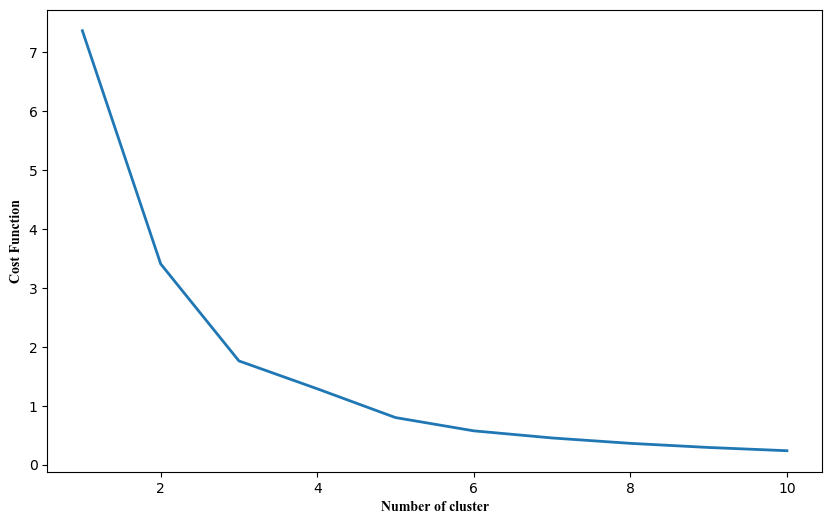

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

numCluster = np.linspace(1,10,num=10).astype(int)
costFunction = []

for i in range (len(numCluster)):
    
    kmeans = KMeans(n_clusters=numCluster[i], random_state=0).fit(dataFrame_FeaturesNorm)
    costFunction.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(numCluster, costFunction, linewidth=2)
plt.xlabel("Number of cluster",fontname="Times New Roman")
plt.ylabel("Cost Function",fontname="Times New Roman")
plt.savefig('kcluster.png', format='png', dpi=720)
plt.show()

From the elbow method above, we can confirm that the optimum number of clusters for this particular case is 3. Therefore, let's conduct the k-Means clustering once more but this time we will use 3 as number of clusters.

### Clustering <a name="3.3"></a>

As stated above, we now know that the optimum number of cluster would be 3. So let's simulate k-Means with number of cluster = 3.

In [31]:
numCluster = 3
kmeans = KMeans(n_clusters=numCluster, random_state=0).fit(dataFrame_FeaturesNorm)

Then, we merged the cluster results, latitude, longitude, and all of the relevant features in one data frame

In [32]:
dataFrame_Features.insert(0, 'Cluster Labels', kmeans.labels_+1)

dataFrame_Cluster = dataFrame.join(dataFrame_Features.set_index('District'), on='District')
dataFrame_Cluster.head()

,District,Latitude,Longitude,Cluster Labels,no. of cases,no. of People Affected,no. of People Forced to Relocate,Days of Flood Recovery
0,Ciracas,-6.329635,106.876604,1,26,12941.0,984,60.0
1,Pulo Gadung,-6.191109,106.890605,3,0,0.0,0,0.0
2,Tambora,-6.146614,106.801046,3,16,523.0,12772,81.0
3,Cengkareng,-6.152899,106.744718,2,51,828568.0,81643,231.0
4,Gambir,-6.170300,106.814800,3,3,0.0,0,7.0


Now that we have all of the informations in one data frame, we can visualize the cluster results in a map using folium library.

In [33]:
import matplotlib.cm as cm
import matplotlib.colors as colors

dataFrame_Cluster= dataFrame_Cluster.apply(pd.to_numeric,errors='ignore')

mapClusters = folium.Map(location=[jakartaLatitude, jakartaLongitude], zoom_start=10)

# set color scheme for the clusters
rainbow = ['#006400','#ce2727','#FFAE3B']


markers_colors = []

for lat, lon, poi, cluster in zip(dataFrame_Cluster['Latitude'], dataFrame_Cluster['Longitude'], dataFrame_Cluster['District'], dataFrame_Cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(mapClusters)
       
mapClusters

And there we have it. The dictricts of Jakarta divided into three clusters based on the severity of the flood and how prone they are to have a big scale of flood in the future as well as the amount of people that might be affected by it.

However in order to understand more about the characteristics of each cluster, let's take a look at the characteristic features of each clusters.

#### Cluster 1

In [34]:
 dataFrame_Cluster.loc[dataFrame_Cluster['Cluster Labels'] == 1]

,District,Latitude,Longitude,Cluster Labels,no. of cases,no. of People Affected,no. of People Forced to Relocate,Days of Flood Recovery
0,Ciracas,-6.329635,106.876604,1,26,12941.0,984,60.0
7,Cilincing,-6.129015,106.944454,1,33,45478.0,23646,118.0
8,Tebet,-6.226016,106.858396,1,41,140138.0,31043,177.0
10,Kebayoran Baru,-6.243164,106.799850,1,29,34747.0,524,80.0
12,Pasar Minggu,-6.291950,106.827835,1,32,31648.0,7946,93.0
13,Mampang Prapatan,-6.250878,106.823021,1,36,6995.0,2246,81.0
15,Kebon Jeruk,-6.192572,106.769725,1,43,177859.0,14695,139.0
16,Kebayoran Lama,-6.249128,106.777782,1,40,10833.0,801,107.0
17,Grogol Petamburan,-6.164188,106.788317,1,31,5746.0,7590,120.0
18,Cakung,-6.185562,106.940109,1,22,25121.0,5614,106.0


As we have seen above, cluster 1 is the cluster for all of the districs that are relatively safe from floods, although they are not completely safe. Of all of the other clusters, they have the lowest value in the combination of features (i.e low number of flood cases, low number of days for flood recovery, etc). Therefore, the districs which occupied this cluster would require less attention everytime the rain pours down the city.

In the map, this cluster is shown with the green marker.

#### Cluster 2

In [35]:
dataFrame_Cluster.loc[dataFrame_Cluster['Cluster Labels'] == 2]

,District,Latitude,Longitude,Cluster Labels,no. of cases,no. of People Affected,no. of People Forced to Relocate,Days of Flood Recovery
3,Cengkareng,-6.152899,106.744718,2,51,828568.0,81643,231.0
5,Kramat Jati,-6.274940,106.862501,2,74,170580.0,35631,256.0
37,Jatinegara,-6.229147,106.877417,2,64,421638.0,52174,312.0


There are only three districts that occupied cluster 2. However, this cluster represents the districts with the highest risk of floods once the heavy rain pours down the city. As we can see from the data frame above, all of the three districts have by far the most cases of floods, the number of people affected by them, and they also take the longest time to recover from floods. In other words, these districts will potentially show the most severe damages once heavy rain pours down the city.

Therefore, the districts listed in this cluster require the highest attention should the rainfall rate is moderate or high. In the map, this cluster is shown with the red marker.

#### Cluster 3

In [36]:
dataFrame_Cluster.loc[dataFrame_Cluster['Cluster Labels'] == 3]

,District,Latitude,Longitude,Cluster Labels,no. of cases,no. of People Affected,no. of People Forced to Relocate,Days of Flood Recovery
1,Pulo Gadung,-6.191109,106.890605,3,0,0.0,0,0.0
2,Tambora,-6.146614,106.801046,3,16,523.0,12772,81.0
4,Gambir,-6.170300,106.814800,3,3,0.0,0,7.0
6,Koja,-6.120750,106.907362,3,16,4236.0,6067,52.0
9,Matraman,-6.203624,106.864579,3,9,2844.0,2259,21.0
11,Cempaka Putih,-6.181214,106.868548,3,1,0.0,0,2.0
14,Sawah Besar,-6.155891,106.833580,3,9,17376.0,110,17.0
19,Setiabudi,-6.221706,106.826308,3,4,30.0,690,6.0
22,Jagakarsa,-6.330101,106.822237,3,17,2736.0,1737,51.0
23,Tanah Abang,-6.202400,106.811900,3,14,51860.0,10002,60.0


Cluster 3 represents the districts which showed relatively moderate damages when the heavy rain pours down. They are not as safe as the cluster 1 but also not as severe as cluster 2. If we take a closer look, eventhough some of the districts have lower amount of people that affected by floods compared to cluster 1, but they have more cases of floods over the span 2013 until 2016 and in general they need longer time to recover from floods.

Therefore, the districts that occupied this cluster need a moderate amount of attention should heavy rain pours down the city. Whenever the government and the residents take a good attention to the environment in the districts, they could potentially move to cluster 1. However when they don't, the districts in this cluster would potentially move to cluster 2 in the future. 

In the map, this cluster is shown with orange marker.

**Conclusion**: the optimum number of clusters to segment the districts in Jakarta based on the potential risks and the severity caused by floods is 3. Cluster 1 consists of districts which are relatively safe and require less attention when the heavy rainfall occurs. Cluster 2 consists of the district that we should focus our attention most of the times when the heavy rainfall occurs. The districts in this cluster are very prone to floods and they have very high potential damages whenever the floods rising up. Finally, cluster 3 consists of districts that require moderate amount of attention. They are not as safe as cluster 1 and not as severe as cluster 2.

## Are the Amount of Parks Helpful to Mitigate the Floods? <a name="4"></a>

By now we already know when would be the best time to do the preparation to mitigate the severity of floods in Jakarta. We also already know the estimation of the number of districts as well as civilians that might be affected by floods with given rate of rainfall. Just now, we also already know which districts that we should focus our attention to during the heavy rainfall rate periods in Jakarta.

The only thing that still missing is the question: how should we mitigate the floods? What should we do to mitigate the floods? It is a very tricky question to answer because we need hefty amount of datasets with different variety of topics to find the solution. 

Unfortunately, there is no open dataset that might be helpful to answer this question. Also, the scope will be even broader if we try to relate the socioeconomics or sociological situations like the growing rate of populations or people's behavior on how they maintain the cleanliness of their environments. The correlation between socieconomics or sociological situation with the occurrence of floods will be out of the scope of this project.

Thus, to try to answer this question, a rather simplistic approach will be conducted. With Foursquare API, the parks nearby each districts will be fetched. Then, the possible correlation between the amount of parks and the severity of floods will be investigated.

First, let's fetch some client ID and client Secret from Foursquare Developers.

In [37]:
CLIENT_ID = 'AD445RMQFTWHNTQ4CBZV3ZHR4JGC1DXH15EZRCTSJZP22DEJ'

In [38]:
CLIENT_SECRET = 'I2TFDNK3RQIASVL4YXJDV2CUTWWUS3QUWPI25DU2F45KW0VZ'

Then, we need to define the ID of the venue that we are interested in. Since we are looking for data about parks, then we need to define its ID. With this ID, then at the end we will get specific results only for places with park categories. The complete detail about the IDs of various different venues can be found in Foursquare Developers page.

In [39]:
Park = '4bf58dd8d48988d163941735'

Next, we define a function to automatize the query process to Foursquare API and at the end, we get the list of venues that we are interested in and put them in a data frame.

In [40]:
def getVenues(names, latitudes, longitudes, category, radius=2000, LIMIT=100):
    
    VERSION = '20180605'
    venuesList=[]
    for lat, long, district in zip(latitudes, longitudes, names):
        
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            category,
            radius,
            LIMIT)
        print(url)
        results = requests.get(url).json()["response"]['groups'][0]['items']
    
        for venue in results:
            if len(results) != 0:
                venuesList.append((district,lat, long, venue['venue']['name'], venue['venue']['location']['lat'], 
                venue['venue']['location']['lng']))
            else:
                venuesList.append((district,lat, long, 'Not Available', 0, 0))
                
    dataVenues = pd.DataFrame(venuesList)
    dataVenues.columns = ['District', 'Latitude', 'Longitude','Venue', 'Venue Latitude', 'Venue Longitude']
            
    return dataVenues

Then, call the function above to get the results about the list of parks in each district.

In [41]:
dataPark = getVenues(dataFrame_Cluster['District'],dataFrame_Cluster['Latitude'],dataFrame_Cluster['Longitude'], Park)

https://api.foursquare.com/v2/venues/explore?client_id=AD445RMQFTWHNTQ4CBZV3ZHR4JGC1DXH15EZRCTSJZP22DEJ&client_secret=I2TFDNK3RQIASVL4YXJDV2CUTWWUS3QUWPI25DU2F45KW0VZ&v=20180605&ll=-6.3296346,106.87660392506864&categoryId=4bf58dd8d48988d163941735&radius=2000&limit=100
https://api.foursquare.com/v2/venues/explore?client_id=AD445RMQFTWHNTQ4CBZV3ZHR4JGC1DXH15EZRCTSJZP22DEJ&client_secret=I2TFDNK3RQIASVL4YXJDV2CUTWWUS3QUWPI25DU2F45KW0VZ&v=20180605&ll=-6.1911085,106.89060525673162&categoryId=4bf58dd8d48988d163941735&radius=2000&limit=100
https://api.foursquare.com/v2/venues/explore?client_id=AD445RMQFTWHNTQ4CBZV3ZHR4JGC1DXH15EZRCTSJZP22DEJ&client_secret=I2TFDNK3RQIASVL4YXJDV2CUTWWUS3QUWPI25DU2F45KW0VZ&v=20180605&ll=-6.1466142,106.80104559691304&categoryId=4bf58dd8d48988d163941735&radius=2000&limit=100
https://api.foursquare.com/v2/venues/explore?client_id=AD445RMQFTWHNTQ4CBZV3ZHR4JGC1DXH15EZRCTSJZP22DEJ&client_secret=I2TFDNK3RQIASVL4YXJDV2CUTWWUS3QUWPI25DU2F45KW0VZ&v=20180605&ll=-6.1528985,1

,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
0,Ciracas,-6.329635,106.876604,Taman Interaksi Sosial,-6.327884,106.881034
1,Ciracas,-6.329635,106.876604,Rest area,-6.340019,106.889379
2,Ciracas,-6.329635,106.876604,Roti & Pisang Bakar Ceger,-6.319265,106.890278
3,Pulo Gadung,-6.191109,106.890605,Taman Lodan,-6.194766,106.896240
4,Pulo Gadung,-6.191109,106.890605,Rawamangun City,-6.196870,106.891284


In [42]:
dataPark.head()

,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
0,Ciracas,-6.329635,106.876604,Taman Interaksi Sosial,-6.327884,106.881034
1,Ciracas,-6.329635,106.876604,Rest area,-6.340019,106.889379
2,Ciracas,-6.329635,106.876604,Roti & Pisang Bakar Ceger,-6.319265,106.890278
3,Pulo Gadung,-6.191109,106.890605,Taman Lodan,-6.194766,106.896240
4,Pulo Gadung,-6.191109,106.890605,Rawamangun City,-6.196870,106.891284


The data doesn't look very good. Eventhough we already gave the specific IDs about the places that we are looking for, but the result of the query gave us not only the information about parks, but also other non-relevant places that we are not interested in.

So, in order to fix this and make sure that we only get the real parks, we need to filter the content of the data frame. The venue that doesn't contain a word "taman" (it's the Indonesian word for parks) will be scraped out from the data frame.

In [43]:
dataPark_Filter = dataPark[dataPark.Venue.str.contains("Taman")].reset_index()
dataPark_Filter.head()

,index,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
0,0,Ciracas,-6.329635,106.876604,Taman Interaksi Sosial,-6.327884,106.881034
1,3,Pulo Gadung,-6.191109,106.890605,Taman Lodan,-6.194766,106.896240
2,9,Pulo Gadung,-6.191109,106.890605,"Taman FBS, Universitas Negeri Jakarta",-6.194022,106.878994
3,10,Pulo Gadung,-6.191109,106.890605,Taman Ketang-Ketang,-6.202224,106.894925
4,11,Pulo Gadung,-6.191109,106.890605,Taman komplek perhubungan Rawamangun,-6.200270,106.898848


And there we have the final data frame for parks in each of the districts. Next, we need to count the number of parks in each of the district so that in the final data frame, there will be only two columns: the name of the districts and the count number of parks.

In [44]:
dataPark_Filter = dataPark_Filter.groupby('District', sort=False).agg({'Venue':'count'})

In [45]:
dataPark_Filter.columns=['Park']
dataPark_Filter.reset_index()
dataPark_Filter.head()

,Park
District,
Ciracas,1
Pulo Gadung,6
Tambora,1
Gambir,9
Koja,1


And we have the final data frame for parks. Next, we need to merge this data frame into our original data frame that we have define in the previous chapter. Then, the name of the districts will be removed because we want to test the correlation between parks and the other features.

In [46]:
dataFrame_Merged = pd.merge(dataFrame_Cluster,dataPark_Filter, on='District',how='outer')
dataFrame_Merged = dataFrame_Merged.fillna(0)
dataFrame_Merged = dataFrame_Merged.drop(['District','Latitude','Longitude','Cluster Labels'],axis=1)
dataFrame_Merged.head()

,no. of cases,no. of People Affected,no. of People Forced to Relocate,Days of Flood Recovery,Park
0,26,12941.0,984,60.0,1.0
1,0,0.0,0,0.0,6.0
2,16,523.0,12772,81.0,1.0
3,51,828568.0,81643,231.0,0.0
4,3,0.0,0,7.0,9.0


And we have our final data frame. Next, we can visualize the number of parks in different districts in Jakarta using histogram to see the distribution of the amount of parks in different districts.

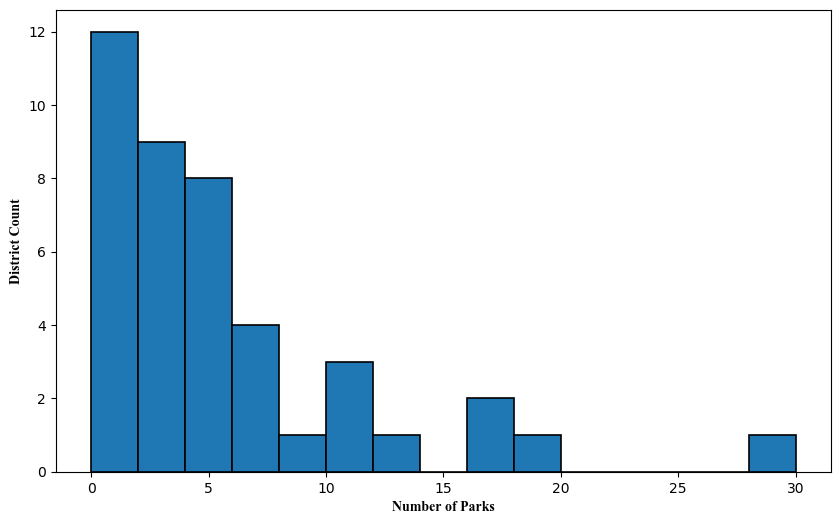

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(dataFrame_Merged['Park'], bins=15, edgecolor='black', linewidth=1.2)

plt.xlabel('Number of Parks',fontname="Times New Roman")
plt.ylabel('District Count',fontname="Times New Roman")
plt.savefig('hist.png', format='png', dpi=720)
plt.show()

As we expected, the distribution of the number of parks in Jakarta's districts is heavily right skewed. This means that the majority of the districts in Jakarta have a small number of parks. In fact, only 8 out of 41 districts have 10 or more parks. This is also one the problem in Jakarta that it is so congested with residential building and skyscrapers that there are not too many green spaces in the city. 

Now, let's take a look at the correlation between the number of parks in any given district with the severity of floods.

In [48]:
corr = dataFrame_Merged.corr(method='pearson')
corr

,no. of cases,no. of People Affected,no. of People Forced to Relocate,Days of Flood Recovery,Park
no. of cases,1.000000,0.574098,0.622585,0.942140,-0.246997
no. of People Affected,0.574098,1.000000,0.854797,0.693484,-0.188454
no. of People Forced to Relocate,0.622585,0.854797,1.000000,0.780099,-0.255296
Days of Flood Recovery,0.942140,0.693484,0.780099,1.000000,-0.281488
Park,-0.246997,-0.188454,-0.255296,-0.281488,1.000000


Here the pearson correlation method is used. If we take a look at the result, we can see that the correlation between parks and all of the features to judge the severity of the flood is not significant by any means. However, it does make sense that the amount of parks in given districts have a negative correlation with all of the flood features. This means that overall, the more the amount of parks a district has, the more the severity of the flood will be reduced. 

Finally, let's plot the correlation between the amount of parks with the days the districts need to recover from floods.

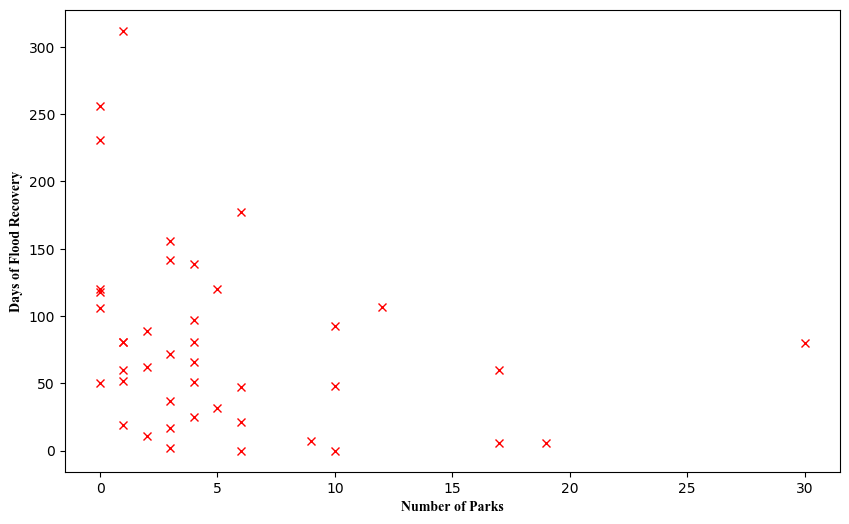

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(dataFrame_Merged['Park'],dataFrame_Merged['Days of Flood Recovery'],'rx')
plt.xlabel('Number of Parks',fontname="Times New Roman")
plt.ylabel('Days of Flood Recovery',fontname="Times New Roman")
plt.savefig('parks.png', format='png', dpi=720)
plt.show()

**Conclusion**: the amount of parks in any given district doesn't have a significant correlation with the severity of the floods. However, they have a slight negative correlation which is enough to encourage the districts to open more green spaces in the city in oder to reduce the severity of the floods.

## Summary and Conclusion <a name="summary"></a>

As stated already in the introduction, the main goal of this project is to understand more the nature of Jakarta floods by utilizing the data. There are in total four different chapters in this project. 

**In the first chapter**, the association between rainfall rate and flood occurrences in Jakarta's subdistricts is investigated. With the possible correlation between two variables, the suggestion regarding the best period of time in a year for the authorities to do precautionary and mitigation measurements is given.

**In the second chapter**, two predictive modeling algorithm with regression model are built in order to predict or estimate the number of subdistricts and people that will be affected by floods with any given rainfall rate. The number of subdistricts that will be affected by floods can be estimated with linear regression model, while the amount of people who will be affected by floods can be estimated with third order polynomial regression model.

**In the third chapter**, the districts in Jakarta is clustered into three segments in order to classify them based on how high their potential risks and severity should a heavy rainfall pours down Jakarta. With the clustering, it clears all of the doubts about which districts that the authorities should focus their attention to during heavy rainfall. 

**In the fourth chapter**, one possible solution to mitigate the floods, which is the amount of parks in any given districts, is discussed. The finding showed that there is no significant correlation between the amount of parks and the severity of floods. However, the amount of parks and severity of floods have a negative correlation, which means that having more parks indeed would be helpful to slighly reduce the severity of floods in any given district.